In [7]:
# Data augment example
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np


np.random.seed(5)

src_dir = 'resrc/test/handwriting_shape/train/triangle/triangle001.png'
trg_dir = 'resrc/test/preview/triangle'

data_aug_gen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=10,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.7,
                                 zoom_range=[0.9, 2.2],
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest')

img = load_img(src_dir)
x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0

for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir=trg_dir, save_prefix='tri', save_format='png') : 
    i +=  1
    if i > 50 :
        print('generated done!')
        break


generated done!


In [159]:
#data pre-processing module - threshold
from os import listdir
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgba2rgb, rgb2gray
from skimage.io import imread, imsave, imshow
from skimage import img_as_uint
from skimage.filters import threshold_triangle

base_path = './resrc/test/skitimg/'

elements = os.listdir(base_path)

for e in elements:
    filename = e.split('.')[0]
    img = imread(base_path + e, as_grey=True)
    img = img_as_ubyte(img)
    threshold = threshold_triangle(img)
    img = img > threshold 
    imsave(base_path + filename + '_grey.png' ,img_as_uint(img))


C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [174]:
#data pre-processing module - edge
from os import listdir
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgba2rgb, rgb2gray
from skimage.io import imread, imsave, imshow
from skimage import img_as_uint
from skimage.feature import canny

base_path = './resrc/test/skitimg/'

elements = os.listdir(base_path)

for e in elements:
    filename = e.split('.')[0]
    img = imread(base_path + e, as_grey=True)
    img = img_as_ubyte(img)
    img = canny(img/255.)
    imsave(base_path + filename + '_grey.png' ,img_as_uint(img))


C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [167]:
# data augment module - bad case
from os import listdir
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(5)

src_dir = 'resrc/test/bad_case'

badcases = os.listdir(src_dir)
    
for data in badcases:
    filename = data.split('.')[0]
    data_aug_gen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=5,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0,
                                     zoom_range=[0.9, 2.2],
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')
    
    img = load_img(src_dir + '/' + filename + '.jpg')
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir=src_dir, save_prefix=filename+'_aug', save_format='png') : 
        i +=  1
        if i > 5 :
            break



In [199]:
#data pre-processing module - edge - used for acutal cases
from os import listdir
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.io import imread, imsave, imshow
from skimage import img_as_uint
from skimage.feature import canny

base_path = './resrc/test/bad_case/'
target_path = './resrc/test/tmp/resize_edges_bad/'
elements = os.listdir(base_path)

for e in elements:
    filename = e.split('.')[0]
    img = imread(base_path + e, as_grey=True)
    img = img_as_ubyte(img)
    img = canny(img/255.)
    imsave(target_path + filename + '_grey.png' ,img_as_uint(img))


C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [176]:
#data pre-processing module - threshold - used for acutal cases
from os import listdir
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.io import imread, imsave, imshow
from skimage import img_as_uint
from skimage.filters import threshold_triangle

base_path = './resrc/test/bad_case/'
target_path = './resrc/test/tmp/thresh_bad/'
elements = os.listdir(base_path)

for e in elements:
    filename = e.split('.')[0]
    img = imread(base_path + e, as_grey=True)
    img = img_as_ubyte(img)
    threshold = threshold_triangle(img)
    img = img > threshold 
    imsave(target_path + filename + '_grey.png' ,img_as_uint(img))


C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [188]:
# resize module
from os import listdir
from skimage.io import imread, imsave, imshow
from skimage.transform import resize

base_path = './resrc/test/tmp/thresh_bad/'
target_path = './resrc/test/tmp/resize_thresh_bad/'
elements = os.listdir(base_path)

resz_x = 240
resz_y = 240

for e in elements:
    filename = e.split('.')[0]
    img = imread(base_path + e, as_grey=True)
    img = img_as_ubyte(img)
    img = resize(img, (resz_x, resz_y))
    imsave(target_path + filename + '.png' ,img_as_uint(img))


C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .fo

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .fo

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .fo

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in s

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

In [8]:
# resize and grey
from os import listdir
from skimage.io import imread, imsave, imshow
from skimage import img_as_uint, img_as_ubyte
from skimage.transform import resize

base_path = './resrc/6.jpg'

img = imread(base_path, as_grey=True)
img = img_as_ubyte(img)
imsave(base_path ,img_as_uint(img))


C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [207]:
# resize and edges
from os import listdir
from skimage.io import imread, imsave, imshow
from skimage import img_as_uint, img_as_ubyte
from skimage.transform import resize
from skimage.feature import canny

base_path = './resrc/test/bad_case/'
target_path = './resrc/test/tmp/resize_edges_bad/'
elements = os.listdir(base_path)

resz_x = 64
resz_y = 64

for e in elements:
    filename = e.split('.')[0]
    img = imread(base_path + e, as_grey=True)
    img = resize(img, (resz_x, resz_y))
    img = img_as_ubyte(img)
    img = canny(img/255.)
    imsave(target_path + filename + '_edges.png' ,img_as_uint(img))


C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

In [12]:
# resize and thresholding
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import img_as_uint, img_as_ubyte
from skimage.io import imread, imsave, imshow
from skimage.transform import resize
from skimage.filters import threshold_triangle

base_path = './resrc/dc/'
target_path = './resrc/'
elements = os.listdir(base_path)

# resz_x = 64
# resz_y = 64

for e in elements:
    filename = e.split('.')[0]
    img = imread(base_path + e, as_grey=True)
    img = img_as_ubyte(img)
#     img = resize(img, (resz_x, resz_y))
    threshold = threshold_triangle(img)
    img = img > threshold 
    imsave(target_path + filename + '_thresholded.png' ,img_as_uint(img))

In [16]:
# integrated filtered file gen
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import img_as_uint, img_as_ubyte
from skimage.io import imread, imsave, imshow
from skimage.transform import resize
from skimage.filters import threshold_triangle
from skimage.feature import canny

good_case_path = './resrc/test/good_case/'
bad_case_path = './resrc/test/bad_case/'

good_case_target_path = ['./resrc/test/tmp/grey_good/', './resrc/test/tmp/resize_edges_good/', './resrc/test/tmp/resize_thresh_good/']
bad_case_target_path = ['./resrc/test/tmp/grey_bad/', './resrc/test/tmp/resize_edges_bad/' , './resrc/test/tmp/resize_thresh_bad/']
target_postfix = ['.png', '_edges.png', '_thresholded.png']

good_cases = os.listdir(good_case_path)
bad_cases = os.listdir(bad_case_path)

resz_x = 64
resz_y = 64

for g in good_cases:
    filename = g.split('.')[0]
    img = imread(good_case_path + g, as_grey=True)
    img = resize(img, (resz_x, resz_y))
    img = img_as_ubyte(img)
    edged_img = canny(img/255.)
    threshold = threshold_triangle(img)
    thresholded_img = img > threshold 
    
    imsave(good_case_target_path[0] + filename +  target_postfix[0], img_as_uint(img))
    imsave(good_case_target_path[1] + filename +  target_postfix[1], img_as_uint(edged_img))
    imsave(good_case_target_path[2] + filename +  target_postfix[2], img_as_uint(thresholded_img))

for b in bad_cases:
    filename = b.split('.')[0]
    img = imread(bad_case_path + b, as_grey=True)
    img = resize(img, (resz_x, resz_y))
    img = img_as_ubyte(img)
    edged_img = canny(img/255.)
    threshold = threshold_triangle(img)
    thresholded_img = img > threshold 
    
    imsave(bad_case_target_path[0] + filename +  target_postfix[0], img_as_uint(img))
    imsave(bad_case_target_path[1] + filename +  target_postfix[1], img_as_uint(edged_img))
    imsave(bad_case_target_path[2] + filename +  target_postfix[2], img_as_uint(thresholded_img))
    

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The defau

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Juyoung\Miniconda3\envs\venv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible preci

In [11]:
# clear sets
from os import listdir, remove

target_paths = ['./resrc/test/sets/no_filter/', './resrc/test/sets/edges/', './resrc/test/sets/threshold/']
data_type = ['test/', 'train/']
case_type = ['bad_case', 'good_case']

for path in target_paths:
    for d in data_type:
        for c in case_type:
            target_path = path + d + c
            elem = listdir(target_path)
            for e in elem:
                remove(target_path + '/' + e)


In [12]:
#clear tmp
from os import listdir, remove

target_paths = ['./resrc/test/tmp/grey_good', './resrc/test/tmp/resize_edges_good', './resrc/test/tmp/resize_thresh_good',
                './resrc/test/tmp/grey_bad', './resrc/test/tmp/resize_edges_bad' , './resrc/test/tmp/resize_thresh_bad']

for path in target_paths:
    elem = listdir(path)
    for e in elem:
        remove(path + '/' + e)


<Figure size 7200x1728 with 0 Axes>

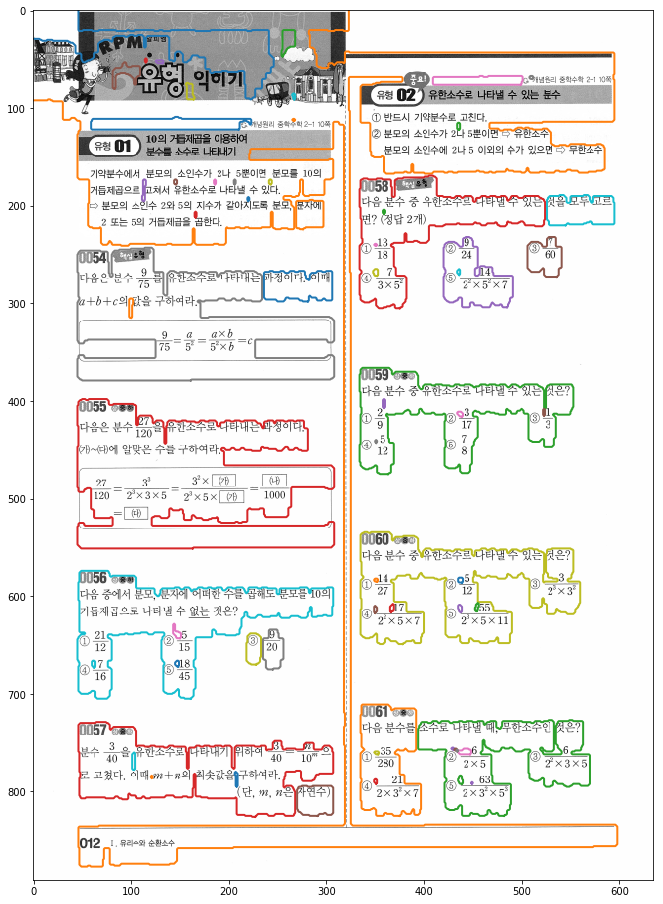

In [4]:
# problem parsing preprocessor - image parser
# 가로 - 세로 기준선 포함
import numpy as np

from skimage import img_as_uint, img_as_ubyte, filters, measure, morphology, segmentation, color
from skimage.io import imread, imsave, imshow
from skimage.feature import canny
from scipy.ndimage.morphology import distance_transform_edt
%matplotlib inline
import matplotlib.pyplot as plt

base_path = './resrc/capstone/'
file_name = '012'
png = '.png'

img = imread(base_path + file_name + png, as_grey=True)

edges = canny(img, sigma=1.3)#중심선이 부서지지 않는 sigma 값으로 canny
edges_denoised = filters.median(edges, selem=np.ones((2,1)))# 텍스트를 뭉게기 전에 세로가 긴 커널을 이용해 중심선 강조

# contour preprocessing ------------------------------------------------------
# 가로가 긴 커널로 텍스트를 blur하여 한 줄에 대한 contour를 얻기 쉽게함
# 세로가 긴 커널로 텍스트를 blur하여 문단에 대한 contour를 얻기 쉽게함
# 처음부터 커널의 길이를 많이 늘리면 중심선이 손상되어 점진적으로 늘려감

edges_denoised = filters.median(edges_denoised, selem=np.ones((4,1)))
edges_denoised = filters.median(edges_denoised, selem=np.ones((1,4)))
edges_denoised = filters.median(edges_denoised, selem=np.ones((6,1)))
edges_denoised = filters.median(edges_denoised, selem=np.ones((1,6)))
# edges_denoised = filters.median(edges_denoised, selem=np.ones((10,1)))#10 이상의 커널은 중심선에 큰 손상을 줌
# edges_denoised = filters.median(edges_denoised, selem=np.ones((1,10)))

for i in range(0,15): #어느정도 blur 되어 이미지들이 클러스터링이 되면 반복적으로 filtering 하여  contour를 추출하기 쉽게함 
    edges_denoised = filters.median(edges_denoised, selem=np.ones((6,1)))
    edges_denoised = filters.median(edges_denoised, selem=np.ones((1,3)))

dist_map = distance_transform_edt(~edges_denoised)
contours = measure.find_contours(dist_map, 1)#주어진 distance map으로 contour찾기.

# contour processing ------------------------------------------------------

# 찾은 contour를 확장하여 문제의 영역을 정의할 것입니다.
# 그에 앞서 통상적으로 문제는 페이지의 절반보다 길지 않으므로 x, y값이 전체페이지의 절반보다 크다면
# 해당 contour는 페이지를 구분하는 세로선, 가로선이 포함되었다고 가정하고 해당 contour를 버립니다.(1)
# 
# 남은 contour들에 대하여 rectify를 하여 처리하기 쉬운 형태로 바꿉니다.(2)
# rectified contour들에 대해 nested된 contour들이 있다면 제거하고 남은 contour들의
# 평균 넓이를 구합니다.(3) - 이 값은 통상적으로 noise로 간주되는 contour들에 의해 파싱하려는 contour보다 작은 값입니다. 
#
# 남은 contour들은 모두 정상이라고 가정하고 모든 contour의 너비를 contour의 너비중 최대값으로 standardize합니다(4)
#
# 남은 standardized contour들의 범위에 적당한 크기의 박스를 씌워 주변을 포함하게 합니다.(5)

#Calculating the limits
width, height = img.shape
limit_width = width/2
limit_height = height/2
    
plt.figure(figsize=(100,24))

fig, ax = plt.subplots(figsize=(60,16))
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

class Map:#containing imformation of rectified contours
    def __init__(self, x_min, x_max, y_min, y_max):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.width = x_max - x_min
        self.height = y_max - y_min
        self.size = self.width * self.height
        self.centroid = [(self.x_min + self.x_max)/2, (self.y_min + self.y_max)/2]
        upper_left, upper_right, bottom_left, bottom_right = [self.y_max, self.x_min], [self.y_max, self.x_max], [self.y_min, self.x_min], [self.y_min, self.x_max]
        self.map = np.array([upper_left, upper_right, bottom_right, bottom_left, upper_left])#needs to be ndarray

class Processor:#class which contains processing data and functions
    standard_width = 0
    avrg_area = 0
    rect_contours = []#Map instance들을 담을 변수
    box_contours = []
    
    def isNested(self, idx):#returns boolean that defines that if idx-th element is nested or not, using centroid
        length = len(self.rect_contours)
        target = self.rect_contours[idx]
        x_centroid = target.centroid[0]
        y_centroid = target.centroid[1]
        
        for i in range (0, length):
            if(i == idx):
                continue
            if(self.rect_contours[i].x_min <= x_centroid and x_centroid <= self.rect_contours[i].x_max):
                if(self.rect_contours[i].y_min <= y_centroid and y_centroid <= self.rect_contours[i].y_max):
                    return True
        
        return False
        
    def removeNested(self):#remove nested contours
        length = len(self.rect_contours)
        victims = []
        
        for i in range(0, length):
            if(self.isNested(i)):
#                 print("contour(" + str(i) + ") is nested one")
                victims.append(i)
        
        for i in range(0, len(victims)):
            tmp = victims[i]
            self.rect_contours.pop(victims[i])
            for j in range(0, len(victims)):
                if(victims[j] > tmp):
                    victims[j] = victims[j] - 1
    
    def standardize(self):#standardizing the contours' width
        length = len(self.rect_contours)
        
        for i in range(0, length):
            if(self.rect_contours[i].width < self.standard_width):
                new_x_min = self.rect_contours[i].x_min
                new_x_max = self.rect_contours[i].x_min + self.standard_width
                new_y_min = self.rect_contours[i].y_min
                new_y_max = self.rect_contours[i].y_max
                self.rect_contours[i] = Map(new_x_min, new_x_max, new_y_min, new_y_max)
    
    def setAverageArea(self):#init the avrg_area
        length = len(self.rect_contours)
        total_area = 0
        
        for i in range (0, length):
            total_area += self.rect_contours[i].size

        self.avrg_area = total_area / length
        
    def denoise(self):#remove contours that is predicted as noise
        length = len(self.rect_contours)
        victims = []
        
        for i in range (0, length):
            if(self.rect_contours[i].size < self.avrg_area):
                 victims.append(i)
        
        for i in range(0, len(victims)):
            tmp = victims[i]
            self.rect_contours.pop(victims[i])
            for j in range(0, len(victims)):
                if(victims[j] > tmp):
                    victims[j] = victims[j] - 1 
    
    def boxing(self):#add box contours
        length = len(self.rect_contours)
        
        for i in range (0, length):
            x_min = self.rect_contours[i].x_min - 7
            x_max = self.rect_contours[i].x_max + 7
            y_min = self.rect_contours[i].y_min - 7
            y_max = self.rect_contours[i].y_max + 7
            box_contour = Map(x_min, x_max, y_min, y_max)
            self.box_contours.append(box_contour)
        
processor = Processor()


for n, contour in enumerate(contours):
    x_min, x_max, y_min, y_max = min(contour[:, 1]), max(contour[:, 1]), min(contour[:, 0]), max(contour[:, 0])
    contour_width, contour_height = x_max - x_min, y_max - y_min
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)



W :  394  H :  549


<Figure size 432x288 with 0 Axes>

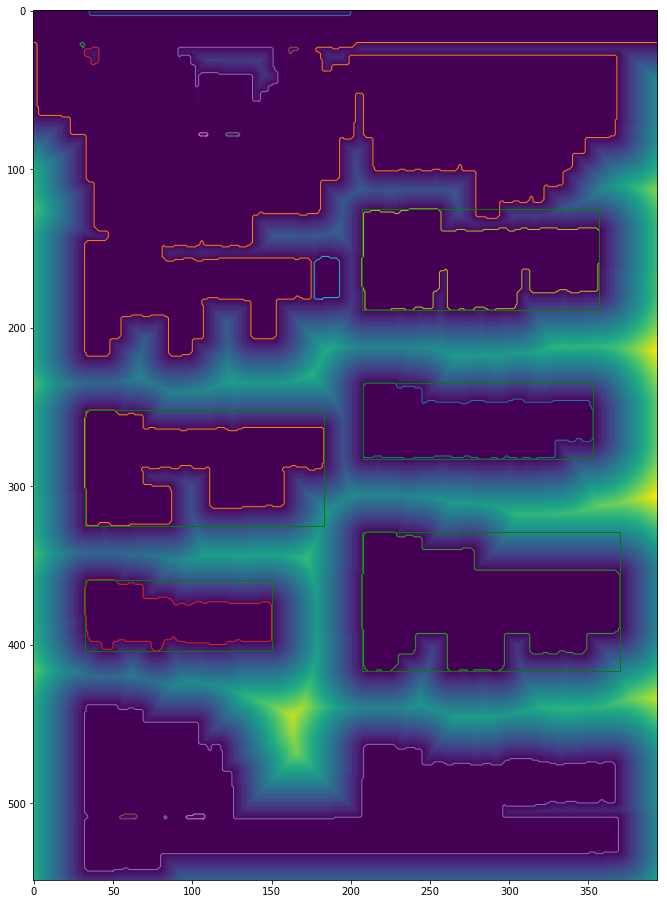

In [3]:
# problem parsing preprocessor - image parser
# 가로-세로 기준선 제거
from os import makedirs, path, listdir
import numpy as np

from skimage import img_as_uint, img_as_ubyte, filters, measure, morphology, segmentation, color
from skimage.io import imread, imsave, imshow
from skimage.feature import canny
from scipy.ndimage.morphology import distance_transform_edt
%matplotlib inline
import matplotlib.pyplot as plt
import statistics

base_path = './resrc/capstone/'
src_dir = base_path + 'src/'
file_name = '046'
png = '.png'

img = imread(src_dir + file_name + png, as_grey=True)
height_img, width_img = img.shape
print("W : ", width_img, " H : ", height_img)

edges = canny(img, sigma=1.3)#중심선이 부서지지 않는 sigma 값으로 canny
edges_denoised = filters.median(edges, selem=np.ones((2,1)))# 텍스트를 뭉게기 전에 세로가 긴 커널을 이용해 중심선 강조

# contour preprocessing ------------------------------------------------------
# 가로가 긴 커널로 텍스트를 blur하여 한 줄에 대한 contour를 얻기 쉽게함
# 세로가 긴 커널로 텍스트를 blur하여 문단에 대한 contour를 얻기 쉽게함
# 처음부터 커널의 길이를 많이 늘리면 중심선이 손상되어 점진적으로 늘려감

edges_denoised = filters.median(edges_denoised, selem=np.ones((4,1)))
edges_denoised = filters.median(edges_denoised, selem=np.ones((1,4)))
edges_denoised = filters.median(edges_denoised, selem=np.ones((6,1)))
edges_denoised = filters.median(edges_denoised, selem=np.ones((1,6)))

for i in range(0,15): #어느정도 blur 되어 이미지들이 클러스터링이 되면 반복적으로 filtering 하여  contour를 추출하기 쉽게함 
    edges_denoised = filters.median(edges_denoised, selem=np.ones((6,1)))
    edges_denoised = filters.median(edges_denoised, selem=np.ones((1,3)))

dist_map = distance_transform_edt(~edges_denoised)
contours = measure.find_contours(dist_map, 1)#주어진 distance map으로 contour찾기.

# contour processing ------------------------------------------------------

# 찾은 contour를 확장하여 문제의 영역을 정의할 것입니다.
# 그에 앞서 통상적으로 문제는 페이지의 절반보다 길지 않으므로 x, y값이 전체페이지의 절반보다 크다면
# 해당 contour는 페이지를 구분하는 세로선, 가로선이 포함되었다고 가정하고 해당 contour를 버립니다.(1)
# 
# 남은 contour들에 대하여 rectify를 하여 처리하기 쉬운 형태로 바꿉니다.(2)
# rectified contour들에 대해 nested된 contour들이 있다면 제거하고 남은 contour들의
# 평균 넓이를 구합니다.(3) - 이 값은 통상적으로 noise로 간주되는 contour들에 의해 파싱하려는 contour보다 작은 값입니다. 
#
# 남은 contour들은 모두 정상이라고 가정하고 모든 contour의 너비를 contour의 너비중 최대값으로 standardize합니다(4)
#
# 남은 standardized contour들의 범위에 적당한 크기의 박스를 씌워 주변을 포함하게 합니다.(5)

#Calculating the limits
limit_width = width_img/2
limit_height = height_img/2
    
plt.figure()

fig, ax = plt.subplots(figsize=(60,16))
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

class Map:#containing imformation of rectified contours
    def __init__(self, x_min, x_max, y_min, y_max):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.width = x_max - x_min
        self.height = y_max - y_min
        self.size = self.width * self.height
        self.centroid = [(self.x_min + self.x_max)/2, (self.y_min + self.y_max)/2]
        upper_left, upper_right, bottom_left, bottom_right = [self.y_max, self.x_min], [self.y_max, self.x_max], [self.y_min, self.x_min], [self.y_min, self.x_max]
        self.map = np.array([upper_left, upper_right, bottom_right, bottom_left, upper_left])#needs to be ndarray
        self.col = 0

class Processor:#class which contains processing data and functions
    standard_width = 0
    avrg_area = 0
    suspected_contours = []
    rect_contours = []#Map instance들을 담을 변수
    box_contours = []
    column_contours = []
    col1, col2 = [], []
    col1_x_max, col1_x_min, col1_y_min, col1_y_max = 0, 0, 0, 0
    col1_width, col1_height = 0, 0
    col2_x_max, col2_x_min, col2_y_min, col2_y_max = 0, 0, 0, 0
    col2_width, col2_height = 0, 0
    
    def __init__(self):
        self.standard_width = 0
        self.avrg_area = 0
        self.rect_contours, self.box_contours, self.suspected_contours, self.column_contours = [], [], [], []
        self.col1, self.col2 = [], []
        self.col1_x_max, self.col1_x_min, self.col1_y_min, self.col1_y_max = 0, 0, 0, 0
        self.col1_width, self.col1_height = 0, 0
        self.col2_x_max, self.col2_x_min, self.col2_y_min, self.col2_y_max = 0, 0, 0, 0
        self.col2_width, self.col2_height = 0, 0
        
    def __delete__(self, instance):
        del self.standard_width, avrg_area
        del self.rect_contours, self.box_contours, self.suspected_contours, self.column_contours
        del self.col1, self.col2
        del self.col1_x_max, self.col1_x_min, self.col1_y_min, self.col1_y_max
        del self.col1_width, self.col1_height
        del self.col2_x_max, self.col2_x_min, self.col2_y_min, self.col2_y_max
        
    def isNested(self, idx):#returns boolean that defines that if idx-th element is nested or not, using centroid
        length = len(self.rect_contours)
        target = self.rect_contours[idx]
        x_centroid = target.centroid[0]
        y_centroid = target.centroid[1]
        
        for i in range (0, length):
            if(i == idx or self.rect_contours[i].size < target.size):# small contour can't contain lager contour
                continue
            if(self.rect_contours[i].x_min <= x_centroid and x_centroid <= self.rect_contours[i].x_max):
                if(self.rect_contours[i].y_min <= y_centroid and y_centroid <= self.rect_contours[i].y_max):
                    return True
        
        return False
        
    def removeNested(self):#remove nested contours
        length = len(self.rect_contours)
        victims = []
        
        for i in range(0, length):
            if(self.isNested(i)):
                victims.append(i)
        
        for i in range(0, len(victims)):
            tmp = victims[i]
            self.rect_contours.pop(victims[i])
            for j in range(0, len(victims)):
                if(victims[j] > tmp):
                    victims[j] = victims[j] - 1
                    
    def columnize(self):#interpolating x_min
        length = len(self.rect_contours)
        x_mins = []
        
        for i in range (0, length):
            contour = self.rect_contours[i]
            x_mins.append(contour.x_min)
            
        std_col1 = min(x_mins)
        x_mins = removeAll(x_mins, std_col1)
        
        for i in range (0, length):#denoising col1
            contour = self.rect_contours[i]
            x_min = contour.x_min
            if(x_min == std_col1):
                self.col1.append(contour)
                self.rect_contours[i].col = 1
                continue
            if(abs(x_min - std_col1) <= 250):#문제의 넓이는 통상적으로 250 내외이므로
                new_x_min = std_col1
                new_x_max = self.rect_contours[i].x_max
                new_y_min = self.rect_contours[i].y_min
                new_y_max = self.rect_contours[i].y_max
                contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                self.rect_contours[i] = contour
                self.rect_contours[i].col = 1
                self.col1.append(contour)
        
        x_mins = []
        for i in range (0, length):
            contour = self.rect_contours[i]
            x_mins.append(contour.x_min)
        
        x_mins = removeAll(x_mins, std_col1)
        if(len(x_mins) == 0):
            return
        std_col2 = min(x_mins)
        
        for i in range (0, length):#denoising col1
            contour = self.rect_contours[i]
            x_min = contour.x_min
            if(x_min == std_col2):
                self.col2.append(contour)
                self.rect_contours[i].col = 2
                continue
            if(abs(x_min - std_col2) <= 250):#문제의 넓이는 통상적으로 250 내외이므로
                new_x_min = std_col2
                new_x_max = self.rect_contours[i].x_max
                new_y_min = self.rect_contours[i].y_min
                new_y_max = self.rect_contours[i].y_max
                contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                self.rect_contours[i] = contour
                self.rect_contours[i].col = 2
                self.col2.append(contour)    
    
    def standardize(self):#standardizing the contours' width
        length = len(self.rect_contours)
        self.col1 = []
        self.col2 = []
        
        for i in range(0, length):
            if(self.rect_contours[i].width < self.standard_width):
                new_x_min = self.rect_contours[i].x_min
                new_x_max = self.rect_contours[i].x_min + self.standard_width
                if(new_x_max > width_img):
                    offset = new_x_max - width_img
                    new_x_max -= offset
                    new_x_min -= offset
                new_y_min = self.rect_contours[i].y_min
                new_y_max = self.rect_contours[i].y_max
                col = self.rect_contours[i].col
                new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                self.rect_contours[i] = new_contour
                self.rect_contours[i].col = col
                if(col == 1):
                    self.col1.append(new_contour)
                else:
                    self.col2.append(new_contour)
            else:
                if(self.rect_contours[i].col == 1):
                    self.col1.append(self.rect_contours[i])
                else:
                    self.col2.append(self.rect_contours[i])
                
    def setAverageArea(self):#init the avrg_area
        length = len(self.rect_contours)
        total_area = 0
        
        for i in range (0, length):
            total_area += self.rect_contours[i].size

        self.avrg_area = total_area / length
        
    def denoise(self):#remove contours that is predicted as noise
        length = len(self.rect_contours)
        victims = []
        
        for i in range (0, length):
            if(self.rect_contours[i].size < (self.avrg_area/4)):
                 victims.append(i)
        
        for i in range(0, len(victims)):
            tmp = victims[i]
            self.rect_contours.pop(victims[i])
            for j in range(0, len(victims)):
                if(victims[j] > tmp):
                    victims[j] = victims[j] - 1 

    def __merge_col1(self):
        length = len(self.col1)
        victim = []
        
        for i in range (0, length):
            src = self.col1[i]
            
            for j in range(0, length):
                if(i == j):
                    continue
                trg = self.col1[j]
                if(src.y_min <= trg.y_min and trg.y_min <= src.y_max):
                    if(src.y_min <= trg.y_max and trg.y_max <= src.y_max):
                        print("case C")
                        self.col1.pop(j)
                        return True   
                    elif(trg.y_max < src.y_max):
                        print("case A")
                        x_min = src.x_min
                        x_max = src.x_max
                        y_min = src.y_min
                        y_max = trg.y_max
                        new_contour = Map(x_min, x_max, y_min, y_max)
                        self.col1.pop(i)
                        if(i < j):
                            j -= 1
                        self.col1.pop(j)
                        self.col1.append(new_contour)                  
                        return True
                elif(src.y_min <= trg.y_max and trg.y_max <= src.y_max ):
                    print("case C")
                    x_min = src.x_min
                    x_max = src.x_max
                    y_min = trg.y_min
                    y_max = src.y_max
                    new_contour = Map(x_min, x_max, y_min, y_max)
                    self.col1.pop(i)
                    if(i < j):
                        j -= 1
                    self.col1.pop(j)
                    self.col1.append(new_contour)
                    return True
        
        return False

    def __merge_col2(self):
        length = len(self.col2)
        victim = []
        
        for i in range (0, length):
            src = self.col2[i]
            
            for j in range(0, length):
                if(i == j):
                    continue
                trg = self.col2[j]
                if(src.y_min <= trg.y_min and trg.y_min <= src.y_max):
                    if(src.y_min <= trg.y_max and trg.y_max <= src.y_max):
                        print("case C")
                        self.col2.pop(j)
                        return True   
                    elif(trg.y_max < src.y_max):
                        print("case A")
                        x_min = src.x_min
                        x_max = src.x_max
                        y_min = src.y_min
                        y_max = trg.y_max
                        new_contour = Map(x_min, x_max, y_min, y_max)
                        self.col2.pop(i)
                        if(i < j):
                            j -= 1
                        self.col2.pop(j)
                        self.col2.append(new_contour)                  
#                         tmp_fig, tmp_ax = plt.subplots(figsize=(60,16))
#                         tmp_ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
#                         tmp0, tmp1, tmp2 = src.map, trg.map, new_contour.map                    
#                         tmp_ax.plot(tmp0[:, 1], tmp0[:, 0], linewidth=1, color='r')
#                         tmp_ax.plot(tmp1[:, 1], tmp1[:, 0], linewidth=1, color='g')
#                         tmp_ax.plot(tmp2[:, 1], tmp2[:, 0], linewidth=1, color='b')
                        return True
                elif(src.y_min <= trg.y_max and trg.y_max <= src.y_max ):
                    print("case C")
                    x_min = src.x_min
                    x_max = src.x_max
                    y_min = trg.y_min
                    y_max = src.y_max
                    new_contour = Map(x_min, x_max, y_min, y_max)
                    self.col2.pop(i)
                    if(i < j):
                        j -= 1
                    self.col2.pop(j)
                    self.col2.append(new_contour)
#                     tmp_fig, tmp_ax = plt.subplots(figsize=(60,16))
#                     tmp_ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
#                     tmp0, tmp1, tmp2 = src.map, trg.map, new_contour.map          
#                     tmp_ax.plot(tmp0[:, 1], tmp0[:, 0], linewidth=2, color='r')
#                     tmp_ax.plot(tmp1[:, 1], tmp1[:, 0], linewidth=3, color='g')
#                     tmp_ax.plot(tmp2[:, 1], tmp2[:, 0], linewidth=1, color='b')
                    return True
        
        return False
    
    def merge(self):
        while(True):
            print("merging col1...")
            if not self.__merge_col1():
                break
        
        cnt = 0
        while(True):
#             if cnt == 1:
#                 break
            print("merging col2...")
            if not self.__merge_col2():
                break
            cnt += 1 
            
        
        self.rect_contours = []
        
        for c in self.col1:
            c.col = 1
            self.rect_contours.append(c)
        
        for c in self.col2:
            c.col2 = 2
            self.rect_contours.append(c)
            
    def column_standardize(self):
        len1, len2, length = len(self.col1), len(self.col2), len(self.rect_contours)
        std_width1, std_width2 = 0, 0
        self.col1_y_min = height_img
        self.col2_y_min = height_img
        
        for i in range (0, len1):
            trg = self.col1[i]
            if(std_width1 < trg.width):
                std_width1 = trg.width
        
        for i in range (0, len2):
            trg = self.col2[i]
            if(std_width2 < trg.width):
                std_width2 = trg.width
        
        self.col1 = []
        self.col2 = []
#set each cells' width in column equally ------------------------------------------------------------------------
        for i in range(0, length):
            col = self.rect_contours[i].col
            if(col == 1):
                if(self.rect_contours[i].width < std_width1):
                    new_x_min = self.rect_contours[i].x_min
                    new_x_max = self.rect_contours[i].x_min + std_width1
                    new_y_min = self.rect_contours[i].y_min
                    new_y_max = self.rect_contours[i].y_max
                    new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                    self.rect_contours[i] = new_contour
                    self.rect_contours[i].col = col
                    self.col1.append(self.rect_contours[i])
                else:
                    self.col1.append(self.rect_contours[i])
                
                if(self.rect_contours[i].y_min < self.col1_y_min):
                    self.col1_y_min = self.rect_contours[i].y_min
                if(self.col1_y_max < self.rect_contours[i].y_max):
                    self.col1_y_max = self.rect_contours[i].y_max
                    
            else:
                if(self.rect_contours[i].width < std_width2):
                    new_x_min = self.rect_contours[i].x_min
                    new_x_max = self.rect_contours[i].x_min + std_width2
                    new_y_min = self.rect_contours[i].y_min
                    new_y_max = self.rect_contours[i].y_max
                    new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                    self.rect_contours[i] = new_contour
                    self.rect_contours[i].col = col
                    self.col2.append(self.rect_contours[i])
                else:
                    self.col2.append(self.rect_contours[i])
                    
                if(self.rect_contours[i].y_min < self.col2_y_min):
                    self.col2_y_min = self.rect_contours[i].y_min
                if(self.col2_y_max < self.rect_contours[i].y_max):
                    self.col2_y_max = self.rect_contours[i].y_max
        
#update column info. ----------------------------------------------------------------------------
        col1_sample, col2_sample = self.col1[0], self.col2[0]
        
        self.col1_x_min = col1_sample.x_min
        self.col1_x_max = col1_sample.x_max
        self.col1_width = col1_sample.width
        self.col2_x_min = col2_sample.x_min
        self.col2_x_max = col2_sample.x_max
        self.col2_width = col2_sample.width
        self.col1_height = self.col1_y_max - self.col1_y_min
        self.col2_height = self.col2_y_max - self.col2_y_min 
        
        col_gap = self.col2_x_min - self.col1_x_max
        std_col_gap = 27 # statistics which to get from sampling 30 pages
        
        #print(self.col1_x_max, self.col2_x_min, col_gap)
#adjust the column's cells if it is suspected that there is deprecated cells in column ----------
        if(std_col_gap < col_gap):
            offset = col_gap - std_col_gap
            self.col1_width += offset
            self.col1_x_max = self.col1_x_min + self.col1_width
                    
        victims = []
        for i in range (0, length):
            if(self.rect_contours[i].col == 1):
                victims.append(i)
                
        
        
        for i in range(0, len(victims)):
            tmp = victims[i]
            self.rect_contours.pop(victims[i])
            for j in range(0, len(victims)):
                if(victims[j] > tmp):
                    victims[j] = victims[j] - 1 
        
        for i in range (0, len1):
            trg = self.col1[i]
            new_x_min = self.col1_x_min
            new_x_max = self.col1_x_max
            new_y_min = self.col1[i].y_min
            new_y_max = self.col1[i].y_max
            new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
            new_contour.col = 1
            self.col1[i] = new_contour
            self.rect_contours.append(new_contour)
            
        col_h_gap = abs(self.col2_height - self.col1_height)
        print(col_h_gap)
        
        std_col_h_gap = 150 # statistics which to get from sampling 30 pages
        short_col = 0
        
        if(std_col_h_gap < col_h_gap):
            if(self.col1_height < self.col2_height):
                short_col = 1
            else:
                short_col = 2
        
        if (short_col != 0) :
            sus_len = len(self.suspected_contours)
            targets = []

            if(short_col == 1):
                new_col_height = self.col1_height
            else:
                new_col_height = self.col2_height

            for i in range(0, sus_len):
                trg = self.suspected_contours[i]
                if(short_col == 1):
                    if(self.col1_x_min <= trg.x_min and trg.x_min <= self.col1_x_max):
                        if(self.col1_x_min <= trg.x_max and trg.x_max <= self.col1_x_max):
                            targets.append(trg)

                else:
                    if(self.col2_x_min <= trg.x_min and trg.x_min <= self.col2_x_max):
                        if(self.col2_x_min <= trg.x_max and trg.x_max <= self.col2_x_max):
                            targets.append(trg)


            sus_processor = Processor()
            sus_processor.avrg_area = self.avrg_area
            sus_processor.rect_contours = targets
            sus_processor.removeNested()
            sus_processor.denoise()

            targets = sus_processor.rect_contours

            for i in range(0, len(targets)):
                trg = targets[i]
                if(short_col == 1):
                    new_x_min = self.col1_x_min
                    new_x_max = self.col1_x_max
                    new_y_min = trg.y_min
                    new_y_max = trg.y_max
                    new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                    new_contour.col = 1
                    self.rect_contours.append(new_contour)
                    self.col1.append(new_contour)
                    if(trg.y_min < self.col1_y_min):
                        self.col1_y_min = trg.y_min
                        new_col_height = self.col1_y_max - trg.y_min
                        self.col1_height = new_col_height
                        gap = abs(self.col2_height - new_col_height)
                        if(gap < std_col_h_gap):
                            break
                else:
                    new_x_min = self.col2_x_min
                    new_x_max = self.col2_x_max
                    new_y_min = trg.y_min
                    new_y_max = trg.y_max
                    new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                    new_contour.col = 2
                    self.rect_contours.append(new_contour)
                    self.col2.append(new_contour)
                    if(trg.y_min < self.col2_y_min):
                        self.col2_y_min = trg.y_min
                        new_col_height = self.col2_y_max - trg.y_min
                        self.col2_height = new_col_height
                        gap = abs(self.col1_height - new_col_height)
                        if(gap < std_col_h_gap):
                            break

        column = Map(self.col1_x_min, self.col1_x_max, self.col1_y_min, self.col1_y_max)
        self.column_contours.append(column)
        column = Map(self.col2_x_min, self.col2_x_max, self.col2_y_min, self.col2_y_max)
        self.column_contours.append(column)
                
           
    def boxing(self):#add box contours
        length = len(self.rect_contours)
        
        for i in range (0, length):
            x_min = self.rect_contours[i].x_min - 7
            x_max = self.rect_contours[i].x_max + 7
            y_min = self.rect_contours[i].y_min - 7
            y_max = self.rect_contours[i].y_max + 7
            box_contour = Map(x_min, x_max, y_min, y_max)
            self.box_contours.append(box_contour)           
          
    def parseImage(self):
        save_dir = base_path + '/parsed/'
        new_dir_path = save_dir + file_name
        if not path.exists(new_dir_path):
            makedirs(new_dir_path)
        length = len(self.box_contours)
        
        for i in range (0, length):
            y1 = int(self.box_contours[i].y_min)
            y2 = int(self.box_contours[i].y_max)
            x1 = int(self.box_contours[i].x_min)
            x2 = int(self.box_contours[i].x_max)
            cropped = img[y1:y2,x1:x2]
            tmp_fig, tmp_ax = plt.subplots(figsize=(15,4))
            tmp_ax.imshow(cropped, interpolation='nearest', cmap=plt.cm.gray)
            tmp_arr = np.array(cropped)
            tmp_y, tmp_x = tmp_arr.shape
            inner_boundary = Map(7, tmp_x-7, 7, tmp_y-7).map
            tmp_ax.plot(inner_boundary[:, 1], inner_boundary[:, 0], linewidth=1, color='g')
            tmp_ax.set_axis_off()
            tmp_fig.savefig(new_dir_path + '/' + file_name + '_' + str(i) + png, bbox_inches='tight', pad_inches = 0)
            
# custom defined functions -------------------------------------------------------------------------            
def removeAll(the_list, val): #remove all the elem which has certain key, val
   return [value for value in the_list if value != val]            

processor = Processor()

for n, contour in enumerate(contours):
    x_min, x_max, y_min, y_max = min(contour[:, 1]), max(contour[:, 1]), min(contour[:, 0]), max(contour[:, 0])
    contour_width, contour_height = x_max - x_min, y_max - y_min
    upper_boundary = height_img/5
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
    if(contour_width >= limit_width or contour_height >= limit_height):#유효하지 않은 contour(가로, 세로 기준선등)제거
        continue
    else:
        # 파싱된 문제 중 적어도 하나는 성공적으로 완료되었다고 가정합니다.
        # 차후에 요소의 width 중 가장 긴 width를 이용하여 파싱에 실패한 요소들의 너비를 기준화합니다..
        cent_y = y_min + y_max
        cent_y /= 2
        if(cent_y < upper_boundary):#화면 상단의 noise 제거
            rect_contour = Map(x_min, x_max, y_min, y_max)
            processor.suspected_contours.append(rect_contour)
            continue
        if(processor.standard_width < contour_width):
            processor.standard_width = contour_width
        #simplify the contours as rectangle
        rect_contour = Map(x_min, x_max, y_min, y_max)
        processor.rect_contours.append(rect_contour)

processor.removeNested()
processor.setAverageArea()
processor.denoise()
# processor.columnize()
# processor.standardize()
# processor.merge()
# processor.column_standardize()
# processor.boxing()
# processor.parseImage()

# debugging line - DON'T REMOVE IT
# for rect_contour in processor.rect_contours:
#     contour = rect_contour.map  
#     ax.plot(rect_contour.x_min, rect_contour.y_min, 'ro')
#     ax.plot(rect_contour.x_min, rect_contour.y_max, 'ro')
#     ax.plot(rect_contour.x_max, rect_contour.y_min, 'ro')
#     ax.plot(rect_contour.x_max, rect_contour.y_max, 'ro')
#     ax.plot(rect_contour.centroid[0], rect_contour.centroid[1], 'ro')

# for sus_contour in processor.suspected_contours:
#     contour = sus_contour.map
#     ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='b')

for rect_contour in processor.rect_contours:
    contour = rect_contour.map
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='g')

# for box_contour in processor.box_contours:
#     contour = box_contour.map
#     ax.plot(contour[:, 1], contour[:, 0], linewidth=.5, color='r') 
    
for column_contour in processor.column_contours:
    contour = column_contour.map
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='b')
    
# plt.show()
# plt.imshow(edges_denoised)
plt.imshow(dist_map)


FILENAME :  012 W :  635  H :  891
merging col1...
merging col2...
case C
merging col2...
73.0
FILENAME :  013 W :  643  H :  894


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

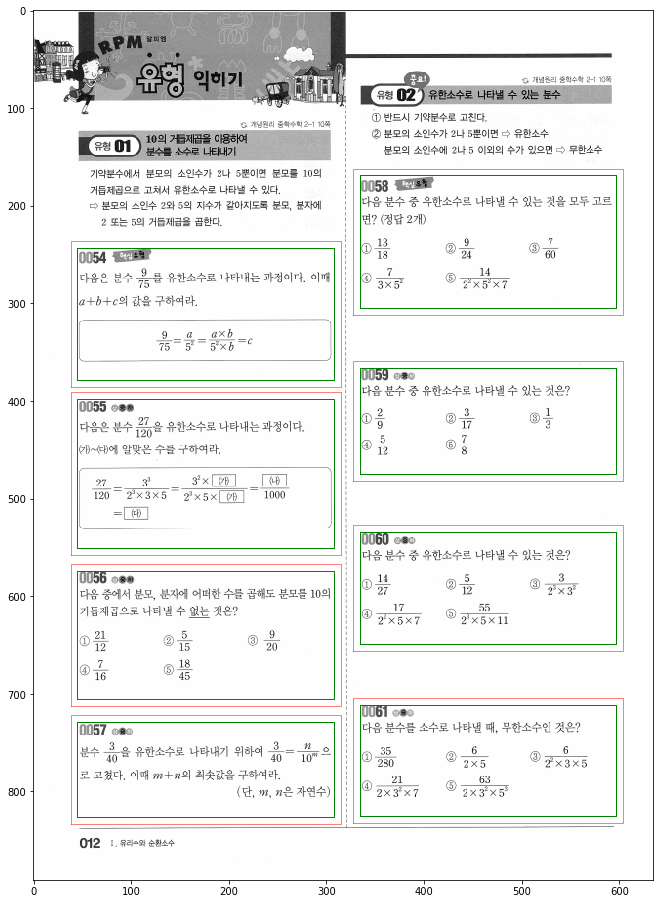

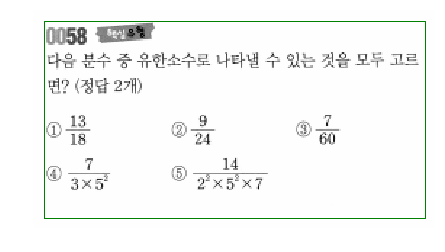

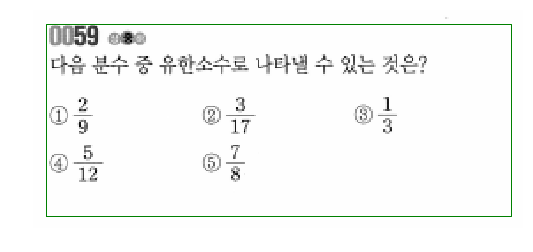

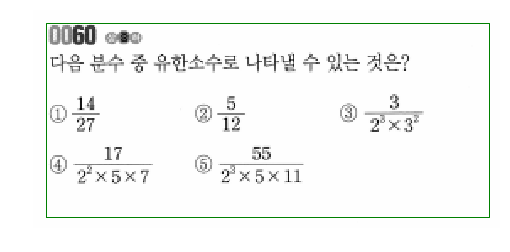

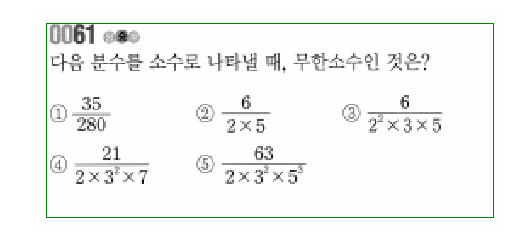

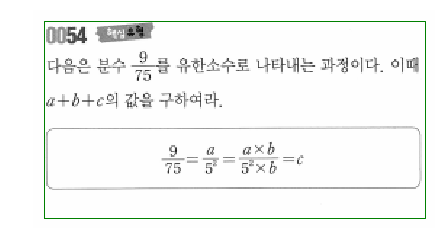

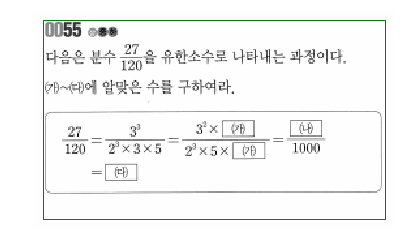

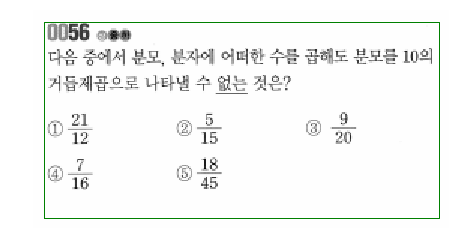

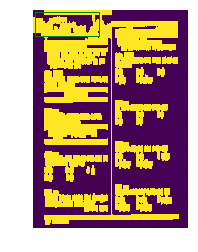

In [2]:
from os import makedirs, path, listdir
import numpy as np

from skimage import img_as_uint, img_as_ubyte, filters, measure, morphology, segmentation, color
from skimage.io import imread, imsave, imshow
from skimage.feature import canny
from scipy.ndimage.morphology import distance_transform_edt
%matplotlib inline
import matplotlib.pyplot as plt
import statistics

base_path = './resrc/capstone/'
src_dir = base_path + 'src/'
png = '.png'

class Map:#containing imformation of rectified contours
    def __init__(self, x_min, x_max, y_min, y_max):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.width = x_max - x_min
        self.height = y_max - y_min
        self.size = self.width * self.height
        self.centroid = [(self.x_min + self.x_max)/2, (self.y_min + self.y_max)/2]
        upper_left, upper_right, bottom_left, bottom_right = [self.y_max, self.x_min], [self.y_max, self.x_max], [self.y_min, self.x_min], [self.y_min, self.x_max]
        self.map = np.array([upper_left, upper_right, bottom_right, bottom_left, upper_left])#needs to be ndarray
        self.col = 0

class Processor:#class which contains processing data and functions
    standard_width = 0
    avrg_area = 0
    suspected_contours = []
    rect_contours = []#Map instance들을 담을 변수
    box_contours = []
    column_contours = []
    col1, col2 = [], []
    col1_x_max, col1_x_min, col1_y_min, col1_y_max = 0, 0, 0, 0
    col1_width, col1_height = 0, 0
    col2_x_max, col2_x_min, col2_y_min, col2_y_max = 0, 0, 0, 0
    col2_width, col2_height = 0, 0
    
    def __init__(self):
        self.standard_width = 0
        self.avrg_area = 0
        self.rect_contours, self.box_contours, self.suspected_contours, self.column_contours = [], [], [], []
        self.col1, self.col2 = [], []
        self.col1_x_max, self.col1_x_min, self.col1_y_min, self.col1_y_max = 0, 0, 0, 0
        self.col1_width, self.col1_height = 0, 0
        self.col2_x_max, self.col2_x_min, self.col2_y_min, self.col2_y_max = 0, 0, 0, 0
        self.col2_width, self.col2_height = 0, 0
        
    def __delete__(self, instance):
        del self.standard_width, avrg_area
        del self.rect_contours, self.box_contours, self.suspected_contours, self.column_contours
        del self.col1, self.col2
        del self.col1_x_max, self.col1_x_min, self.col1_y_min, self.col1_y_max
        del self.col1_width, self.col1_height
        del self.col2_x_max, self.col2_x_min, self.col2_y_min, self.col2_y_max
        del self.col2_width, self.col2_height
    
    def isNested(self, idx):#returns boolean that defines that if idx-th element is nested or not, using centroid
        length = len(self.rect_contours)
        target = self.rect_contours[idx]
        x_centroid = target.centroid[0]
        y_centroid = target.centroid[1]
        
        for i in range (0, length):
            if(i == idx or self.rect_contours[i].size < target.size):# small contour can't contain lager contour
                continue
            if(self.rect_contours[i].x_min <= x_centroid and x_centroid <= self.rect_contours[i].x_max):
                if(self.rect_contours[i].y_min <= y_centroid and y_centroid <= self.rect_contours[i].y_max):
                    return True
        
        return False
        
    def removeNested(self):#remove nested contours
        length = len(self.rect_contours)
        victims = []
        
        for i in range(0, length):
            if(self.isNested(i)):
                victims.append(i)
        
        for i in range(0, len(victims)):
            tmp = victims[i]
            self.rect_contours.pop(victims[i])
            for j in range(0, len(victims)):
                if(victims[j] > tmp):
                    victims[j] = victims[j] - 1
                    
    def columnize(self):#interpolating x_min
        length = len(self.rect_contours)
        x_mins = []
        
        for i in range (0, length):
            contour = self.rect_contours[i]
            x_mins.append(contour.x_min)
            
        std_col1 = min(x_mins)
        x_mins = removeAll(x_mins, std_col1)
        
        if(len(x_mins) == 0):
            return
        
        for i in range (0, length):#denoising col1
            contour = self.rect_contours[i]
            x_min = contour.x_min
            if(x_min == std_col1):
                self.col1.append(contour)
                self.rect_contours[i].col = 1
                continue
            if(abs(x_min - std_col1) <= 250):#문제의 넓이는 통상적으로 250 내외이므로
                new_x_min = std_col1
                new_x_max = self.rect_contours[i].x_max
                new_y_min = self.rect_contours[i].y_min
                new_y_max = self.rect_contours[i].y_max
                contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                self.rect_contours[i] = contour
                self.rect_contours[i].col = 1
                self.col1.append(contour)
        
        x_mins = []
        for i in range (0, length):
            contour = self.rect_contours[i]
            x_mins.append(contour.x_min)
        
        x_mins = removeAll(x_mins, std_col1)
        std_col2 = min(x_mins)
        
        for i in range (0, length):#denoising col1
            contour = self.rect_contours[i]
            x_min = contour.x_min
            if(x_min == std_col2):
                self.col2.append(contour)
                self.rect_contours[i].col = 2
                continue
            if(abs(x_min - std_col2) <= 250):#문제의 넓이는 통상적으로 250 내외이므로
                new_x_min = std_col2
                new_x_max = self.rect_contours[i].x_max
                new_y_min = self.rect_contours[i].y_min
                new_y_max = self.rect_contours[i].y_max
                contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                self.rect_contours[i] = contour
                self.rect_contours[i].col = 2
                self.col2.append(contour)    
    
    def standardize(self):#standardizing the contours' width
        length = len(self.rect_contours)
        self.col1 = []
        self.col2 = []
        
        for i in range(0, length):
            if(self.rect_contours[i].width < self.standard_width):
                new_x_min = self.rect_contours[i].x_min
                new_x_max = self.rect_contours[i].x_min + self.standard_width
                if(new_x_max > width_img):
                    offset = new_x_max - width_img
                    new_x_max -= offset
                    new_x_min -= offset
                new_y_min = self.rect_contours[i].y_min
                new_y_max = self.rect_contours[i].y_max
                col = self.rect_contours[i].col
                new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                self.rect_contours[i] = new_contour
                self.rect_contours[i].col = col
                if(col == 1):
                    self.col1.append(new_contour)
                else:
                    self.col2.append(new_contour)
            else:
                if(self.rect_contours[i].col == 1):
                    self.col1.append(self.rect_contours[i])
                else:
                    self.col2.append(self.rect_contours[i])
                
    def setAverageArea(self):#init the avrg_area
        length = len(self.rect_contours)
        total_area = 0
        
        for i in range (0, length):
            total_area += self.rect_contours[i].size

        self.avrg_area = total_area / length
        
    def denoise(self):#remove contours that is predicted as noise
        length = len(self.rect_contours)
        victims = []
        
        for i in range (0, length):
            if(self.rect_contours[i].size < (self.avrg_area/4)):
                 victims.append(i)
        
        for i in range(0, len(victims)):
            tmp = victims[i]
            self.rect_contours.pop(victims[i])
            for j in range(0, len(victims)):
                if(victims[j] > tmp):
                    victims[j] = victims[j] - 1 

    def __merge_col1(self):
        length = len(self.col1)
        victim = []
        
        for i in range (0, length):
            src = self.col1[i]
            
            for j in range(0, length):
                if(i == j):
                    continue
                trg = self.col1[j]
                if(src.y_min <= trg.y_min and trg.y_min <= src.y_max):
                    if(src.y_min <= trg.y_max and trg.y_max <= src.y_max):
                        print("case C")
                        self.col1.pop(j)
                        return True   
                    elif(trg.y_max < src.y_max):
                        print("case A")
                        x_min = src.x_min
                        x_max = src.x_max
                        y_min = src.y_min
                        y_max = trg.y_max
                        new_contour = Map(x_min, x_max, y_min, y_max)
                        self.col1.pop(i)
                        if(i < j):
                            j -= 1
                        self.col1.pop(j)
                        self.col1.append(new_contour)                  
                        return True
                elif(src.y_min <= trg.y_max and trg.y_max <= src.y_max ):
                    print("case C")
                    x_min = src.x_min
                    x_max = src.x_max
                    y_min = trg.y_min
                    y_max = src.y_max
                    new_contour = Map(x_min, x_max, y_min, y_max)
                    self.col1.pop(i)
                    if(i < j):
                        j -= 1
                    self.col1.pop(j)
                    self.col1.append(new_contour)
                    return True
        
        return False

    def __merge_col2(self):
        length = len(self.col2)
        victim = []
        
        for i in range (0, length):
            src = self.col2[i]
            
            for j in range(0, length):
                if(i == j):
                    continue
                trg = self.col2[j]
                if(src.y_min <= trg.y_min and trg.y_min <= src.y_max):
                    if(src.y_min <= trg.y_max and trg.y_max <= src.y_max):
                        print("case C")
                        self.col2.pop(j)
                        return True   
                    elif(trg.y_max < src.y_max):
                        print("case A")
                        x_min = src.x_min
                        x_max = src.x_max
                        y_min = src.y_min
                        y_max = trg.y_max
                        new_contour = Map(x_min, x_max, y_min, y_max)
                        self.col2.pop(i)
                        if(i < j):
                            j -= 1
                        self.col2.pop(j)
                        self.col2.append(new_contour)                  
#                         tmp_fig, tmp_ax = plt.subplots(figsize=(60,16))
#                         tmp_ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
#                         tmp0, tmp1, tmp2 = src.map, trg.map, new_contour.map                    
#                         tmp_ax.plot(tmp0[:, 1], tmp0[:, 0], linewidth=1, color='r')
#                         tmp_ax.plot(tmp1[:, 1], tmp1[:, 0], linewidth=1, color='g')
#                         tmp_ax.plot(tmp2[:, 1], tmp2[:, 0], linewidth=1, color='b')
                        return True
                elif(src.y_min <= trg.y_max and trg.y_max <= src.y_max ):
                    print("case C")
                    x_min = src.x_min
                    x_max = src.x_max
                    y_min = trg.y_min
                    y_max = src.y_max
                    new_contour = Map(x_min, x_max, y_min, y_max)
                    self.col2.pop(i)
                    if(i < j):
                        j -= 1
                    self.col2.pop(j)
                    self.col2.append(new_contour)
#                     tmp_fig, tmp_ax = plt.subplots(figsize=(60,16))
#                     tmp_ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
#                     tmp0, tmp1, tmp2 = src.map, trg.map, new_contour.map          
#                     tmp_ax.plot(tmp0[:, 1], tmp0[:, 0], linewidth=2, color='r')
#                     tmp_ax.plot(tmp1[:, 1], tmp1[:, 0], linewidth=3, color='g')
#                     tmp_ax.plot(tmp2[:, 1], tmp2[:, 0], linewidth=1, color='b')
                    return True
        
        return False
    
    def merge(self):
        while(True):
            print("merging col1...")
            if not self.__merge_col1():
                break
        
        cnt = 0
        while(True):
#             if cnt == 1:
#                 break
            print("merging col2...")
            if not self.__merge_col2():
                break
            cnt += 1 
            
        
        self.rect_contours = []
        
        for c in self.col1:
            c.col = 1
            self.rect_contours.append(c)
        
        for c in self.col2:
            c.col2 = 2
            self.rect_contours.append(c)
            
    def column_standardize(self):
        len1, len2, length = len(self.col1), len(self.col2), len(self.rect_contours)
        std_width1, std_width2 = 0, 0
        self.col1_y_min = height_img
        self.col2_y_min = height_img
        
        for i in range (0, len1):
            trg = self.col1[i]
            if(std_width1 < trg.width):
                std_width1 = trg.width
        
        for i in range (0, len2):
            trg = self.col2[i]
            if(std_width2 < trg.width):
                std_width2 = trg.width
        
        self.col1 = []
        self.col2 = []
#set each cells' width in column equally ------------------------------------------------------------------------
        for i in range(0, length):
            col = self.rect_contours[i].col
            if(col == 1):
                if(self.rect_contours[i].width < std_width1):
                    new_x_min = self.rect_contours[i].x_min
                    new_x_max = self.rect_contours[i].x_min + std_width1
                    new_y_min = self.rect_contours[i].y_min
                    new_y_max = self.rect_contours[i].y_max
                    new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                    self.rect_contours[i] = new_contour
                    self.rect_contours[i].col = col
                    self.col1.append(self.rect_contours[i])
                else:
                    self.col1.append(self.rect_contours[i])
                
                if(self.rect_contours[i].y_min < self.col1_y_min):
                    self.col1_y_min = self.rect_contours[i].y_min
                if(self.col1_y_max < self.rect_contours[i].y_max):
                    self.col1_y_max = self.rect_contours[i].y_max
                    
            else:
                if(self.rect_contours[i].width < std_width2):
                    new_x_min = self.rect_contours[i].x_min
                    new_x_max = self.rect_contours[i].x_min + std_width2
                    new_y_min = self.rect_contours[i].y_min
                    new_y_max = self.rect_contours[i].y_max
                    new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                    self.rect_contours[i] = new_contour
                    self.rect_contours[i].col = col
                    self.col2.append(self.rect_contours[i])
                else:
                    self.col2.append(self.rect_contours[i])
                    
                if(self.rect_contours[i].y_min < self.col2_y_min):
                    self.col2_y_min = self.rect_contours[i].y_min
                if(self.col2_y_max < self.rect_contours[i].y_max):
                    self.col2_y_max = self.rect_contours[i].y_max
        
#update column info. ----------------------------------------------------------------------------
        col1_sample, col2_sample = self.col1[0], self.col2[0]
        
        self.col1_x_min = col1_sample.x_min
        self.col1_x_max = col1_sample.x_max
        self.col1_width = col1_sample.width
        self.col2_x_min = col2_sample.x_min
        self.col2_x_max = col2_sample.x_max
        self.col2_width = col2_sample.width
        self.col1_height = self.col1_y_max - self.col1_y_min
        self.col2_height = self.col2_y_max - self.col2_y_min 
        
        col_gap = self.col2_x_min - self.col1_x_max
        std_col_gap = 27 # statistics which to get from sampling 30 pages
        
        #print(self.col1_x_max, self.col2_x_min, col_gap)
#adjust the column's cells if it is suspected that there is deprecated cells in column ----------
        if(std_col_gap < col_gap):
            offset = col_gap - std_col_gap
            self.col1_width += offset
            self.col1_x_max = self.col1_x_min + self.col1_width
                    
        victims = []
        for i in range (0, length):
            if(self.rect_contours[i].col == 1):
                victims.append(i)
                
        
        
        for i in range(0, len(victims)):
            tmp = victims[i]
            self.rect_contours.pop(victims[i])
            for j in range(0, len(victims)):
                if(victims[j] > tmp):
                    victims[j] = victims[j] - 1 
        
        for i in range (0, len1):
            trg = self.col1[i]
            new_x_min = self.col1_x_min
            new_x_max = self.col1_x_max
            new_y_min = self.col1[i].y_min
            new_y_max = self.col1[i].y_max
            new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
            new_contour.col = 1
            self.col1[i] = new_contour
            self.rect_contours.append(new_contour)
            
        col_h_gap = abs(self.col2_height - self.col1_height)
        print(col_h_gap)
        
        std_col_h_gap = 150 # statistics which to get from sampling 30 pages
        short_col = 0
        
        if(std_col_h_gap < col_h_gap):
            if(self.col1_height < self.col2_height):
                short_col = 1
            else:
                short_col = 2
        
        if (short_col != 0) :
            sus_len = len(self.suspected_contours)
            targets = []

            if(short_col == 1):
                new_col_height = self.col1_height
            else:
                new_col_height = self.col2_height

            for i in range(0, sus_len):
                trg = self.suspected_contours[i]
                if(short_col == 1):
                    if(self.col1_x_min <= trg.x_min and trg.x_min <= self.col1_x_max):
                        if(self.col1_x_min <= trg.x_max and trg.x_max <= self.col1_x_max):
                            targets.append(trg)

                else:
                    if(self.col2_x_min <= trg.x_min and trg.x_min <= self.col2_x_max):
                        if(self.col2_x_min <= trg.x_max and trg.x_max <= self.col2_x_max):
                            targets.append(trg)


            sus_processor = Processor()
            sus_processor.avrg_area = self.avrg_area
            sus_processor.rect_contours = targets
            sus_processor.removeNested()
            sus_processor.denoise()

            targets = sus_processor.rect_contours

            for i in range(0, len(targets)):
                trg = targets[i]
                if(short_col == 1):
                    new_x_min = self.col1_x_min
                    new_x_max = self.col1_x_max
                    new_y_min = trg.y_min
                    new_y_max = trg.y_max
                    new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                    new_contour.col = 1
                    self.rect_contours.append(new_contour)
                    self.col1.append(new_contour)
                    if(trg.y_min < self.col1_y_min):
                        self.col1_y_min = trg.y_min
                        new_col_height = self.col1_y_max - trg.y_min
                        self.col1_height = new_col_height
                        gap = abs(self.col2_height - new_col_height)
                        if(gap < std_col_h_gap):
                            break
                else:
                    new_x_min = self.col2_x_min
                    new_x_max = self.col2_x_max
                    new_y_min = trg.y_min
                    new_y_max = trg.y_max
                    new_contour = Map(new_x_min, new_x_max, new_y_min, new_y_max)
                    new_contour.col = 2
                    self.rect_contours.append(new_contour)
                    self.col2.append(new_contour)
                    if(trg.y_min < self.col2_y_min):
                        self.col2_y_min = trg.y_min
                        new_col_height = self.col2_y_max - trg.y_min
                        self.col2_height = new_col_height
                        gap = abs(self.col1_height - new_col_height)
                        if(gap < std_col_h_gap):
                            break

        column = Map(self.col1_x_min, self.col1_x_max, self.col1_y_min, self.col1_y_max)
        self.column_contours.append(column)
        column = Map(self.col2_x_min, self.col2_x_max, self.col2_y_min, self.col2_y_max)
        self.column_contours.append(column)
                
           
    def boxing(self):#add box contours
        length = len(self.rect_contours)
        
        for i in range (0, length):
            x_min = self.rect_contours[i].x_min - 7
            x_max = self.rect_contours[i].x_max + 7
            y_min = self.rect_contours[i].y_min - 7
            y_max = self.rect_contours[i].y_max + 7
            box_contour = Map(x_min, x_max, y_min, y_max)
            self.box_contours.append(box_contour)           
          
    def parseImage(self):
        save_dir = base_path + '/parsed/'
        new_dir_path = save_dir + file_name
        if not path.exists(new_dir_path):
            makedirs(new_dir_path)
        length = len(self.box_contours)
        
        for i in range (0, length):
            y1 = int(self.box_contours[i].y_min)
            y2 = int(self.box_contours[i].y_max)
            x1 = int(self.box_contours[i].x_min)
            x2 = int(self.box_contours[i].x_max)
            cropped = img[y1:y2,x1:x2]
            tmp_fig, tmp_ax = plt.subplots(figsize=(15,4))
            tmp_ax.imshow(cropped, interpolation='nearest', cmap=plt.cm.gray)
            tmp_arr = np.array(cropped)
            tmp_y, tmp_x = tmp_arr.shape
            inner_boundary = Map(7, tmp_x-7, 7, tmp_y-7).map
            tmp_ax.plot(inner_boundary[:, 1], inner_boundary[:, 0], linewidth=1, color='g')
            tmp_ax.set_axis_off()
            tmp_fig.savefig(new_dir_path + '/' + file_name + '_' + str(i) + png, bbox_inches='tight', pad_inches = 0)
        
# custom defined functions -------------------------------------------------------------------------            
def removeAll(the_list, val): #remove all the elem which has certain key, val
   return [value for value in the_list if value != val]     

elements = listdir(src_dir)
f_list = []

for e in elements:
    f_list.append(e.split(".")[0])

for file_name in f_list:

    img = imread(src_dir + file_name + png, as_grey=True)
    height_img, width_img = img.shape
    print("FILENAME : ", file_name, "W : ", width_img, " H : ", height_img)

    edges = canny(img, sigma=1.3)#중심선이 부서지지 않는 sigma 값으로 canny
    edges_denoised = filters.median(edges, selem=np.ones((2,1)))# 텍스트를 뭉게기 전에 세로가 긴 커널을 이용해 중심선 강조

    edges_denoised = filters.median(edges_denoised, selem=np.ones((4,1)))
    edges_denoised = filters.median(edges_denoised, selem=np.ones((1,4)))
    edges_denoised = filters.median(edges_denoised, selem=np.ones((6,1)))
    edges_denoised = filters.median(edges_denoised, selem=np.ones((1,6)))

    for i in range(0,15): #어느정도 blur 되어 이미지들이 클러스터링이 되면 반복적으로 filtering 하여  contour를 추출하기 쉽게함 
        edges_denoised = filters.median(edges_denoised, selem=np.ones((6,1)))
        edges_denoised = filters.median(edges_denoised, selem=np.ones((1,3)))

    dist_map = distance_transform_edt(~edges_denoised)
    contours = measure.find_contours(dist_map, 1)#주어진 distance map으로 contour찾기.

    width, height = img.shape
    limit_width = width/2
    limit_height = height/2

    plt.figure()

    fig, ax = plt.subplots(figsize=(60,16))
    ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
    
    processor = Processor()

    for n, contour in enumerate(contours):
        x_min, x_max, y_min, y_max = min(contour[:, 1]), max(contour[:, 1]), min(contour[:, 0]), max(contour[:, 0])
        contour_width, contour_height = x_max - x_min, y_max - y_min
        upper_boundary = height_img/5
    #     ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
        if(contour_width >= limit_width or contour_height >= limit_height):#유효하지 않은 contour(가로, 세로 기준선등)제거
            continue
        else:
            # 파싱된 문제 중 적어도 하나는 성공적으로 완료되었다고 가정합니다.
            # 차후에 요소의 width 중 가장 긴 width를 이용하여 파싱에 실패한 요소들의 너비를 기준화합니다..
            cent_y = y_min + y_max
            cent_y /= 2
            if(cent_y < upper_boundary):#화면 상단의 noise 제거
                rect_contour = Map(x_min, x_max, y_min, y_max)
                processor.suspected_contours.append(rect_contour)
                continue
            if(processor.standard_width < contour_width):
                processor.standard_width = contour_width
            #simplify the contours as rectangle
            rect_contour = Map(x_min, x_max, y_min, y_max)
            processor.rect_contours.append(rect_contour)
            
    processor.removeNested()
    processor.setAverageArea()
    processor.denoise()
    processor.columnize()
    processor.standardize()
    processor.merge()
    processor.column_standardize()
    processor.boxing()
    processor.parseImage()
    
    # debugging line - DON'T REMOVE IT
    # for rect_contour in processor.rect_contours:
    #     contour = rect_contour.map  
    #     ax.plot(rect_contour.x_min, rect_contour.y_min, 'ro')
    #     ax.plot(rect_contour.x_min, rect_contour.y_max, 'ro')
    #     ax.plot(rect_contour.x_max, rect_contour.y_min, 'ro')
    #     ax.plot(rect_contour.x_max, rect_contour.y_max, 'ro')
    #     ax.plot(rect_contour.centroid[0], rect_contour.centroid[1], 'ro')

    # for sus_contour in processor.suspected_contours:
    #     contour = sus_contour.map
    #     ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='b')
    
#     print(len(contours))
#     print(len(processor.rect_contours))
    
    for rect_contour in processor.rect_contours:
        contour = rect_contour.map
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='g')

    for box_contour in processor.box_contours:
        contour = box_contour.map
        ax.plot(contour[:, 1], contour[:, 0], linewidth=.5, color='r') 

#     for column_contour in processor.column_contours:
#         contour = column_contour.map
#         ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='b')
            
    plt.show()
    